In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os
import json
from PIL import Image
import numpy as np

# Directory paths
train_dir = 'C:/Users/RITUJA/Strawberry Disease Detection/train'
val_dir = 'C:/Users/RITUJA/Strawberry Disease Detection/val'
test_dir = 'C:/Users/RITUJA/Strawberry Disease Detection/test'

# Function to load images and corresponding metadata
def load_data_from_directory(directory):
    image_data = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg'):
                image_path = os.path.join(root, file)
                json_path = os.path.join(root, file.replace('.jpg', '.json'))
                if os.path.exists(json_path):
                    try:
                        # Load JSON metadata
                        with open(json_path, 'r') as f:
                            data = json.load(f)
                            # Extract label from nested structure if necessary
                            label = None
                            for shape in data.get('shapes', []):
                                if 'label' in shape:
                                    label = shape['label']
                                    break
                            if label is None:
                                raise KeyError("'label' key not found in JSON shapes")
                            
                            # Load image using PIL (you can use any library)
                            image = Image.open(image_path)
                            # Preprocess image (resize, normalize, etc.)
                            image = image.resize((224, 224))  # Resize if necessary
                            image = np.array(image) / 255.0  # Normalize
                            # Append image and label as tuple
                            image_data.append((image, label))
                    except KeyError as e:
                        continue  # Skip image if 'label' key not found
                    except json.JSONDecodeError as e:
                        continue  # Skip image if JSON decoding error occurs
                else:
                    continue  # Skip image if JSON file not found
    return image_data

# Load train, val, and test data
train_data = load_data_from_directory(train_dir)
val_data = load_data_from_directory(val_dir)
test_data = load_data_from_directory(test_dir)

# Extract images and labels
train_images = np.array([data[0] for data in train_data])
train_labels = np.array([data[1] for data in train_data])

val_images = np.array([data[0] for data in val_data])
val_labels = np.array([data[1] for data in val_data])

test_images = np.array([data[0] for data in test_data])
test_labels = np.array([data[1] for data in test_data])

# Print out the shape of loaded data
print(f'Train data shape: {train_images.shape}, Train labels shape: {train_labels.shape}')
print(f'Validation data shape: {val_images.shape}, Validation labels shape: {val_labels.shape}')
print(f'Test data shape: {test_images.shape}, Test labels shape: {test_labels.shape}')

Train data shape: (1450, 224, 224, 3), Train labels shape: (1450,)
Validation data shape: (307, 224, 224, 3), Validation labels shape: (307,)
Test data shape: (743, 224, 224, 3), Test labels shape: (743,)


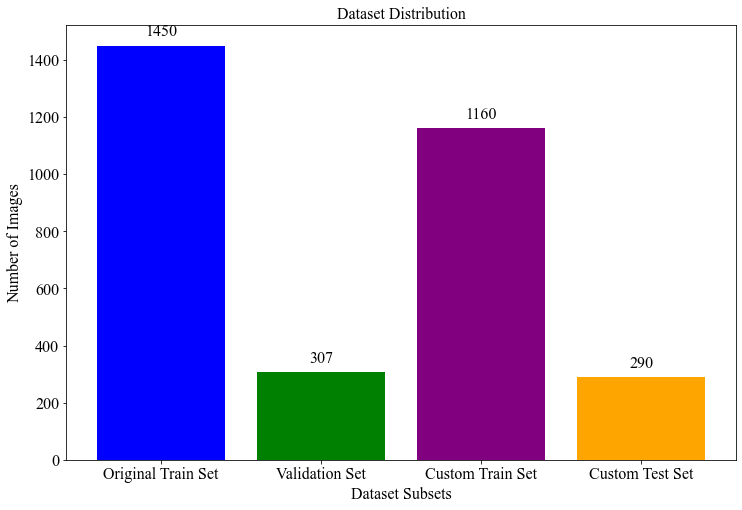

In [1]:
import matplotlib.pyplot as plt

# Dataset distribution
original_train_size = 1450
validation_size = 307
custom_train_size = 1160
custom_test_size = 290

# Data labels and sizes for original and custom splits
data_labels = ['Original Train Set', 'Validation Set', 'Custom Train Set', 'Custom Test Set']
data_sizes = [original_train_size, validation_size, custom_train_size, custom_test_size]

# Plotting the histogram
plt.figure(figsize=(12, 8))
bars = plt.bar(data_labels, data_sizes, color=['blue', 'green', 'purple', 'orange'])

# Setting font properties for labels and title
plt.xlabel('Dataset Subsets', fontsize=16, fontname='Times New Roman')
plt.ylabel('Number of Images', fontsize=16, fontname='Times New Roman')
plt.title('Dataset Distribution', fontsize=16, fontname='Times New Roman')

# Setting font size for tick labels on x-axis and y-axis
plt.xticks(fontsize=16, fontname='Times New Roman')
plt.yticks(fontsize=16, fontname='Times New Roman')

# Annotating the bars with the respective sizes
for bar, size in zip(bars, data_sizes):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 20, 
             size, 
             ha='center', 
             va='bottom', 
             fontsize=16, 
             fontname='Times New Roman')

# Save the plot to a directory in JPG format with 600 DPI
save_directory = "C:/Users/RITUJA/Strawberry Disease Detection/"
plt.savefig(f"{save_directory}dataset_distribution_histogram.jpg", format='jpg', dpi=600)

# Show the plot
plt.show()

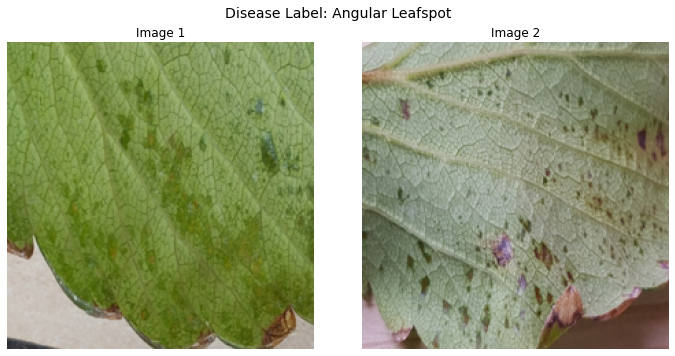

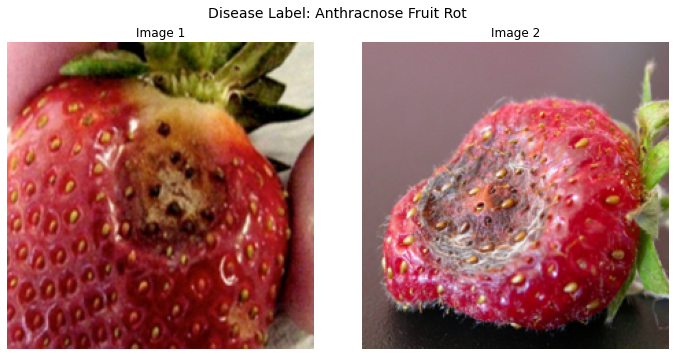

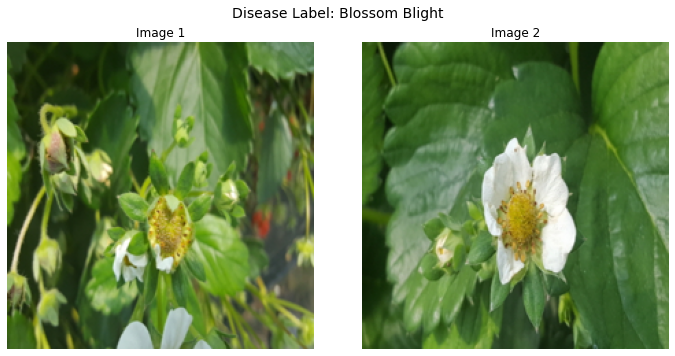

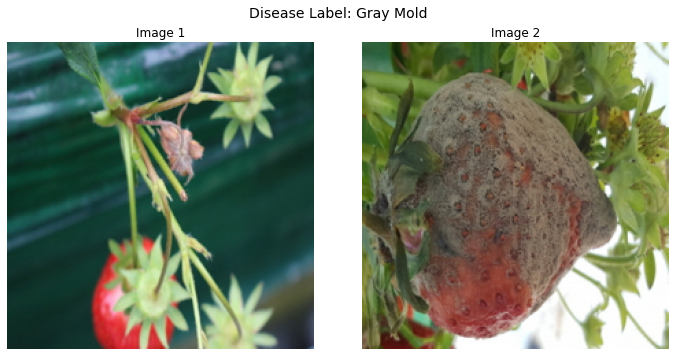

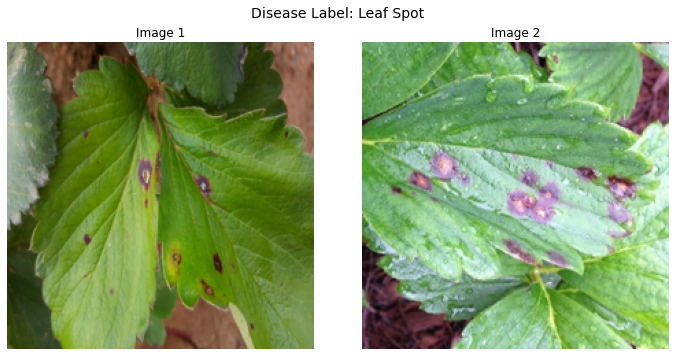

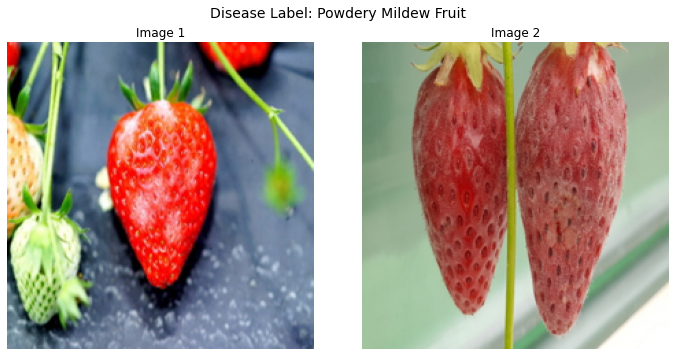

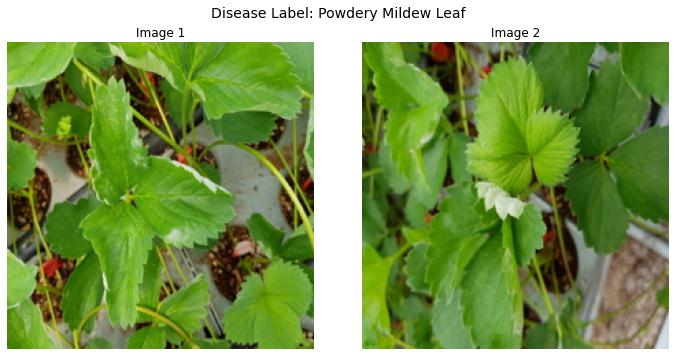

In [36]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Directory paths
train_dir = 'C:/Users/RITUJA/Strawberry Disease Detection/train'

# Function to select random images from each disease category
def select_random_images_per_label(data, num_images_per_label=2):
    label_images = {}
    for image, label in data:
        if label not in label_images:
            label_images[label] = []
        label_images[label].append(image)
    
    sample_images_per_label = {}
    for label, images in label_images.items():
        sample_images_per_label[label] = random.sample(images, min(num_images_per_label, len(images)))
    
    return sample_images_per_label

# Example function to save images as separate JPG files with 600 dpi
def save_images_per_label(sample_images_per_label, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    for label, images in sample_images_per_label.items():
        for i, image in enumerate(images):
            # Convert NumPy array to PIL Image
            pil_image = Image.fromarray((image * 255).astype(np.uint8))  # Convert back to uint8 and scale
            pil_image.save(os.path.join(output_dir, f'{label}_{i + 1}.jpg'), dpi=(600, 600))

# Load train data
train_data = load_data_from_directory(train_dir)

# Select random sample images from each disease category
sample_images_per_label = select_random_images_per_label(train_data, num_images_per_label=2)

# Display images with disease label and image titles, and save as JPG files
for label, images in sample_images_per_label.items():
    fig, axes = plt.subplots(1, len(images), figsize=(10, 5))
    for i, image in enumerate(images):
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(f"Image {i + 1}")
    fig.suptitle(f"Disease Label: {label}", fontsize=14)
    plt.tight_layout()
    plt.show()

    # Save images as JPG files with 600 dpi
    save_images_per_label({label: images}, output_dir='sample_images_output')

In [3]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on all labels to get unique classes and transform labels to numeric
all_labels = np.concatenate((train_labels, val_labels, test_labels))
label_encoder.fit(all_labels)

# Transform string labels to numeric labels
train_labels_numeric = label_encoder.transform(train_labels)
val_labels_numeric = label_encoder.transform(val_labels)
test_labels_numeric = label_encoder.transform(test_labels)

# Example: Convert labels to categorical format (if using categorical_crossentropy loss)
# (Assuming num_classes is the number of unique classes)
num_classes = len(label_encoder.classes_)

# Train labels (assuming already numeric after transformation)
train_labels_categorical = tf.keras.utils.to_categorical(train_labels_numeric, num_classes=num_classes)
val_labels_categorical = tf.keras.utils.to_categorical(val_labels_numeric, num_classes=num_classes)
test_labels_categorical = tf.keras.utils.to_categorical(test_labels_numeric, num_classes=num_classes)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetV2B1, MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=40,   #1
    horizontal_flip=True,  #2
    vertical_flip=True,  #3
    zoom_range=0.2  #4
)

def create_model_a(input_shape=(224, 224, 3), num_classes=7):
    # Enhanced Basic CNN model for strawberry disease detection with added layers
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),  
        MaxPooling2D((2, 2)),
        Conv2D(512, (3, 3), activation='relu'),  
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


def create_model_b(input_shape=(224, 224, 3), num_classes=7):
    # Transfer learning model using VGG16 for strawberry disease detection
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False  # Freeze pre-trained layers

    # Add custom top layers
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

def create_model_c(input_shape=(224, 224, 3), num_classes=7):
    # Transfer learning model using EfficientNetV2B1 for strawberry disease detection
    base_model = EfficientNetV2B1(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False  # Freeze pre-trained layers

    # Add custom top layers
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

def create_model_d(input_shape=(224, 224, 3), num_classes=7):
    # Transfer learning model using MobileNetV2 for strawberry disease detection
    base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False  # Freeze pre-trained layers

    # Add custom top layers
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model_a = create_model_a()  # Model A: Basic CNN model
model_b = create_model_b()  # Model B: Transfer learning with VGG16
model_c = create_model_c()  # Model C: Transfer learning with ResNet50
model_d = create_model_d()  # Model D: Transfer learning with MobileNetV2

model_a.summary()
model_b.summary()
model_c.summary()
model_d.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      13,108,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,205,191 (58.00 MB)

 Trainable params: 15,205,191 (58.00 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,563,847 (105.15 MB)

 Trainable params: 12,849,159 (49.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling (Rescaling)         │ (None, 224, 224, 3)       │               0 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization (Normalization) │ (None, 224, 224, 3)       │               0 │ rescaling[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ normalization[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_conv (Conv2D) │ (None, 112, 112, 16)      │           4,608 │ stem_activation[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_bn            │ (None, 112, 112, 16)      │              64 │ block1a_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_activation    │ (None, 112, 112, 16)      │               0 │ block1a_project_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_project_conv (Conv2D) │ (None, 112, 112, 16)      │           2,304 │ block1a_project_activatio… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_project_bn            │ (None, 112, 112, 16)      │              64 │ block1b_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_project_activation    │ (None, 112, 112, 16)      │               0 │ block1b_project_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_drop (Dropout)        │ (None, 112, 112, 16)      │               0 │ block1b_project_activatio… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_add (Add)             │ (None, 112, 112, 16)      │               0 │ block1b_drop[0][0],        │
│                               │                           │                 │ block1a_project_activatio… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_expand_conv (Conv2D)  │ (None, 56, 56, 64)        │           9,21

 Total params: 39,047,867 (148.96 MB)

 Trainable params: 32,116,743 (122.52 MB)

 Non-trainable params: 6,931,124 (26.44 MB)

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 34,374,727 (131.13 MB)

 Trainable params: 32,116,743 (122.52 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [12]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import os

# Example image path
sample_img_path = 'C:/Users/RITUJA/Strawberry Disease Detection/train/powdery_mildew_fruit90.jpg'

# Load and preprocess the sample image
sample_img = load_img(sample_img_path, target_size=(224, 224))
sample_img_array = img_to_array(sample_img)
sample_img_array = np.expand_dims(sample_img_array, axis=0)  # Expand dimensions to fit the batch size

# Initialize ImageDataGenerator for augmentation
datagen = ImageDataGenerator()

# List of transformation parameters for plotting and saving
transformations = [
    {'name': 'Original', 'transform': None},
    {'name': 'Rotated', 'transform': {'theta': 40}},
    {'name': 'Flipped horizontally', 'transform': {'flip_horizontal': True}},
    {'name': 'Flipped vertically', 'transform': {'flip_vertical': True}},
    {'name': 'Zoomed', 'transform': {'zx': 0.5, 'zy': 0.5}}
]

# Create output directory if it doesn't exist
output_dir = 'sample_images_output'
os.makedirs(output_dir, exist_ok=True)

# Plotting and saving each transformation
for idx, transformation in enumerate(transformations):
    if transformation['name'] == 'Original':
        transformed_img = sample_img_array[0]
    else:
        transformed_img = datagen.apply_transform(sample_img_array[0].copy(), transform_parameters=transformation['transform'])
    
    # Convert array to image
    pil_image = Image.fromarray(transformed_img.astype(np.uint8))
    
    # Save the image with 600 dpi and high quality
    output_path = f'{output_dir}/{transformation["name"].lower().replace(" ", "_")}.jpg'
    pil_image.save(output_path, dpi=(300, 300), quality=100)

In [8]:
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define learning rate reduction criteria
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-7)

# Assuming train_images, train_labels_categorical, val_images, and val_labels_categorical are defined
train_datagen = datagen.flow(train_images, train_labels_categorical, batch_size=32)
val_datagen = datagen.flow(val_images, val_labels_categorical, batch_size=32)

# Train Model A with Early Stopping, Learning Rate Scheduler, and Data Augmentation
history_a = model_a.fit(
    train_datagen,
    epochs=20,
    validation_data=val_datagen,
    callbacks=[early_stopping, lr_scheduler]
)

# Train Model B with Early Stopping, Learning Rate Scheduler, and Data Augmentation
history_b = model_b.fit(
    train_datagen,
    epochs=20,
    validation_data=val_datagen,
    callbacks=[early_stopping, lr_scheduler]
)

# Train Model C with Early Stopping, Learning Rate Scheduler, and Data Augmentation
history_c = model_c.fit(
    train_datagen,
    epochs=20,
    validation_data=val_datagen,
    callbacks=[early_stopping, lr_scheduler]
)

# Train Model D with Early Stopping, Learning Rate Scheduler, and Data Augmentation
history_d = model_d.fit(
    train_datagen,
    epochs=20,
    validation_data=val_datagen,
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.2643 - loss: 1.8447 - val_accuracy: 0.5407 - val_loss: 1.2810 - learning_rate: 1.0000e-04
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.4605 - loss: 1.4125 - val_accuracy: 0.5603 - val_loss: 1.1583 - learning_rate: 1.0000e-04
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.5729 - loss: 1.1813 - val_accuracy: 0.7003 - val_loss: 0.8270 - learning_rate: 1.0000e-04
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.6305 - loss: 0.9976 - val_accuracy: 0.8143 - val_loss: 0.5639 - learning_rate: 1.0000e-04
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.6985 - loss: 0.8604 - val_accuracy: 0.7524 - val_loss: 0.7438 - learning_rate: 1.0000e-04
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.7280 - loss: 0.7742 - val_accuracy: 0.8534 - val_loss: 0.4657 - learning_rate: 1.0000e-04
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.7740 - loss

46/46 ━━━━━━━━━━━━━━━━━━━━ 39s 796ms/step - accuracy: 0.9740 - loss: 0.0755 - val_accuracy: 0.9511 - val_loss: 0.1124 - learning_rate: 1.0000e-06
Epoch 15/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 39s 804ms/step - accuracy: 0.9758 - loss: 0.0751 - val_accuracy: 0.9739 - val_loss: 0.1022 - learning_rate: 1.0000e-06
Epoch 16/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 41s 842ms/step - accuracy: 0.9713 - loss: 0.0726 - val_accuracy: 0.9674 - val_loss: 0.1056 - learning_rate: 1.0000e-07


In [13]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Split the training data into new training and test sets
new_train_images, new_test_images, new_train_labels, new_test_labels = train_test_split(
    train_images, train_labels_numeric, test_size=0.2, random_state=42)

# One-hot encode the labels for the new test set
num_classes = len(set(train_labels_numeric))
new_test_labels_categorical = tf.keras.utils.to_categorical(new_test_labels, num_classes=num_classes)

# Evaluate Model A on the new test data
new_test_loss_a, new_test_acc_a = model_a.evaluate(new_test_images, new_test_labels_categorical)
print(f'Model A - New Test Loss: {new_test_loss_a:.4f}')
print(f'Model A - New Test Accuracy: {new_test_acc_a:.4f}')

# Evaluate Model B on the new test data
new_test_loss_b, new_test_acc_b = model_b.evaluate(new_test_images, new_test_labels_categorical)
print(f'Model B - New Test Loss: {new_test_loss_b:.4f}')
print(f'Model B - New Test Accuracy: {new_test_acc_b:.4f}')

# Evaluate Model C on the new test data
new_test_loss_c, new_test_acc_c = model_c.evaluate(new_test_images, new_test_labels_categorical)
print(f'Model C - New Test Loss: {new_test_loss_c:.4f}')
print(f'Model C - New Test Accuracy: {new_test_acc_c:.4f}')

# Evaluate Model D on the new test data
new_test_loss_d, new_test_acc_d = model_d.evaluate(new_test_images, new_test_labels_categorical)
print(f'Model D - New Test Loss: {new_test_loss_d:.4f}')
print(f'Model D - New Test Accuracy: {new_test_acc_d:.4f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 0.8861 - loss: 0.3288
Model A - New Test Loss: 0.3135
Model A - New Test Accuracy: 0.8931
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8659 - loss: 0.4853
Model B - New Test Loss: 0.4732
Model B - New Test Accuracy: 0.8655
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 497ms/step - accuracy: 0.1359 - loss: 1.8143
Model C - New Test Loss: 1.8055
Model C - New Test Accuracy: 0.1586
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 356ms/step - accuracy: 0.9884 - loss: 0.0327
Model D - New Test Loss: 0.0293
Model D - New Test Accuracy: 0.9897


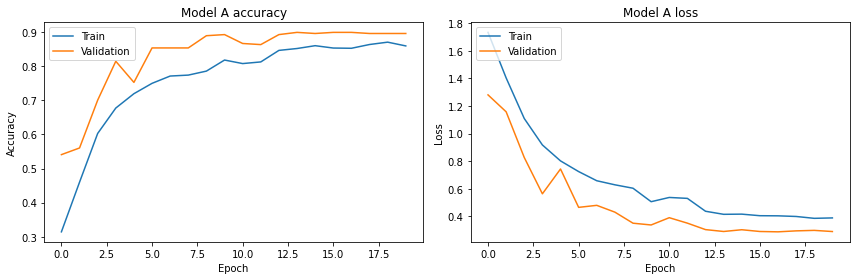

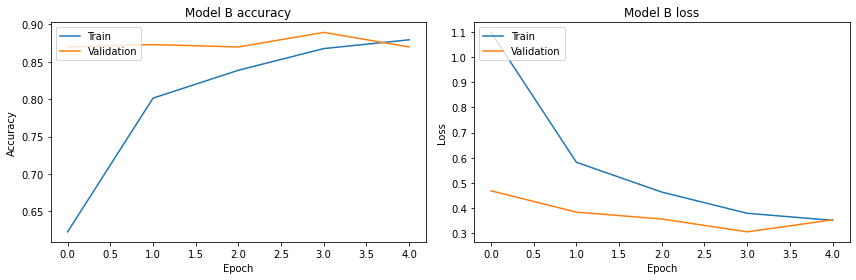

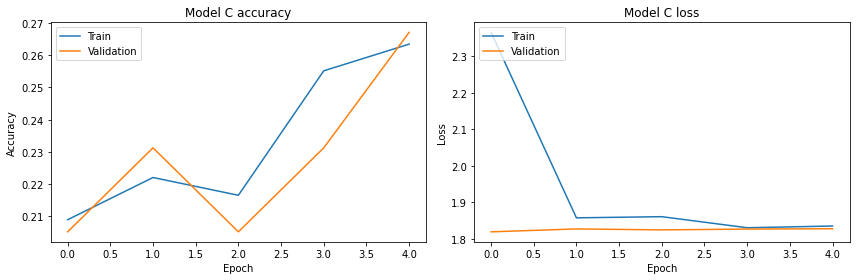

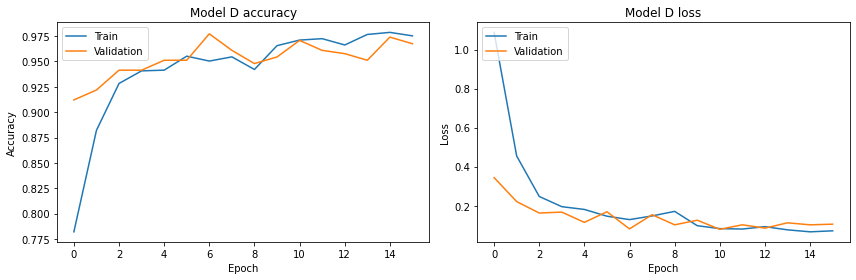

In [14]:
import matplotlib.pyplot as plt

# Plotting for Model A
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_a.history['accuracy'])
plt.plot(history_a.history['val_accuracy'])
plt.title('Model A accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_a.history['loss'])
plt.plot(history_a.history['val_loss'])
plt.title('Model A loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Plotting for Model B
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_b.history['accuracy'])
plt.plot(history_b.history['val_accuracy'])
plt.title('Model B accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_b.history['loss'])
plt.plot(history_b.history['val_loss'])
plt.title('Model B loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Plotting for Model C
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_c.history['accuracy'])
plt.plot(history_c.history['val_accuracy'])
plt.title('Model C accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_c.history['loss'])
plt.plot(history_c.history['val_loss'])
plt.title('Model C loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Plotting for Model D
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_d.history['accuracy'])
plt.plot(history_d.history['val_accuracy'])
plt.title('Model D accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_d.history['loss'])
plt.plot(history_d.history['val_loss'])
plt.title('Model D loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [19]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report

def calculate_coverage(true_labels, predicted_labels):
    correctly_identified_instances = np.sum(true_labels == predicted_labels)
    total_instances = len(true_labels)
    coverage = (correctly_identified_instances / total_instances) * 100
    return coverage

# Generate classification report for Model A
predictions_a = model_a.predict(new_test_images)
predicted_labels_a = np.argmax(predictions_a, axis=1)

print('Classification Report for Model A:')
print(classification_report(new_test_labels, predicted_labels_a))

# Calculate coverage for Model A
coverage_a = calculate_coverage(new_test_labels, predicted_labels_a)
print(f'Coverage for Model A: {coverage_a:.2f}%')
print()

# Generate classification report for Model B
predictions_b = model_b.predict(new_test_images)
predicted_labels_b = np.argmax(predictions_b, axis=1)

print('Classification Report for Model B:')
print(classification_report(new_test_labels, predicted_labels_b))

# Calculate coverage for Model B
coverage_b = calculate_coverage(new_test_labels, predicted_labels_b)
print(f'Coverage for Model B: {coverage_b:.2f}%')
print()

# Generate classification report for Model C
predictions_c = model_c.predict(new_test_images)
predicted_labels_c = np.argmax(predictions_c, axis=1)

print('Classification Report for Model C:')
print(classification_report(new_test_labels, predicted_labels_c))

# Calculate coverage for Model C
coverage_c = calculate_coverage(new_test_labels, predicted_labels_c)
print(f'Coverage for Model C: {coverage_c:.2f}%')
print()

# Generate classification report for Model D
predictions_d = model_d.predict(new_test_images)
predicted_labels_d = np.argmax(predictions_d, axis=1)

print('Classification Report for Model D:')
print(classification_report(new_test_labels, predicted_labels_d))

# Calculate coverage for Model D
coverage_d = calculate_coverage(new_test_labels, predicted_labels_d)
print(f'Coverage for Model D: {coverage_d:.2f}%')

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step
Classification Report for Model A:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        44
           1       0.70      0.70      0.70        10
           2       0.83      1.00      0.91        24
           3       0.85      1.00      0.92        60
           4       0.92      0.95      0.93        92
           5       0.00      0.00      0.00        14
           6       1.00      0.91      0.95        46

    accuracy                           0.89       290
   macro avg       0.75      0.78      0.76       290
weighted avg       0.86      0.89      0.87       290

Coverage for Model A: 89.31%

10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step
Classification Report for Model B:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88        44
           1       0.80      0.40      0.53        10
           2       0.96      0.92      0.94        24
      

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to generate confusion matrix plot and calculate misclassification rate for a given model
def plot_confusion_matrix(model, test_images, test_labels_numeric, num_classes, save_path=None):
    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    
    conf_matrix = confusion_matrix(test_labels_numeric, predicted_labels)

    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('RdPu'))
    plt.title('Confusion Matrix')
    plt.colorbar()

    plt.xticks(np.arange(num_classes), ['Class {}'.format(i) for i in range(num_classes)], rotation=45)
    plt.yticks(np.arange(num_classes), ['Class {}'.format(i) for i in range(num_classes)])

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

    plt.tight_layout()
    
    # Save plot as JPG file if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=600, quality=120)  # Adjust quality if needed
    
    plt.show()
    
    # Calculate Misclassification Rate
    misclassification_rate = 1 - np.trace(conf_matrix) / float(np.sum(conf_matrix))
    print(f"Misclassification Rate: {misclassification_rate:.4f}")

# Example usage: Generate and save confusion matrix plot for each model (replace with your models)
# Generate and save confusion matrix plot for Model A
plot_confusion_matrix(model_a, new_test_images, new_test_labels, num_classes, save_path='conf_matrix_model_a.jpg')

# Generate and save confusion matrix plot for Model B
plot_confusion_matrix(model_b, new_test_images, new_test_labels, num_classes, save_path='conf_matrix_model_b.jpg')

# Generate and save confusion matrix plot for Model C
plot_confusion_matrix(model_c, new_test_images, new_test_labels, num_classes, save_path='conf_matrix_model_c.jpg')

# Generate and save confusion matrix plot for Model D
plot_confusion_matrix(model_d, new_test_images, new_test_labels, num_classes, save_path='conf_matrix_model_d.jpg')

NameError: name 'model_a' is not defined

In [28]:
# Save Model A
model_a.save("C:/Users/RITUJA/Strawberry Disease Detection/strawberry_disease_classification_model_a.keras")

# Save Model B
model_b.save("C:/Users/RITUJA/Strawberry Disease Detection/strawberry_disease_classification_model_b.keras")

# Save Model C
model_c.save("C:/Users/RITUJA/Strawberry Disease Detection/strawberry_disease_classification_model_c.keras")

# Save Model D
model_d.save("C:/Users/RITUJA/Strawberry Disease Detection/strawberry_disease_classification_model_d.keras")

C:\Users\RITUJA\AppData\Local\Temp/ipykernel_10976/3574561689.py:86: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig('linguistic_decision_matrix.jpg', dpi=600, quality=95)


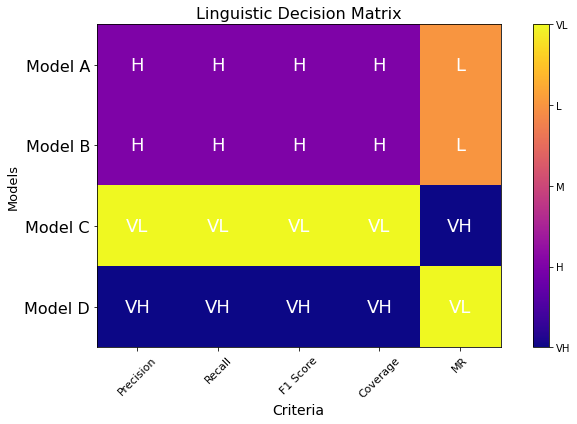

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their corresponding metrics
models = ['Model A', 'Model B', 'Model C', 'Model D']
criteria = ['Precision', 'Recall', 'F1 Score', 'Coverage', 'MR']

# Define the precision, recall, F1 scores, coverage, and misclassification rate for each model (replace with actual values)
precision_values = [0.86, 0.83, 0.03, 0.99]
recall_values = [0.89, 0.87, 0.16, 0.99]
f1_scores = [0.87, 0.84, 0.04, 0.99]
coverage_values = [0.89, 0.87, 0.16, 0.99]
misclassification_rate_values = [0.11, 0.13, 0.84, 0.01]

# Define linguistic terms
linguistic_terms = ['VH', 'H', 'M', 'L', 'VL']

# Create a matrix to store the linguistic terms
linguistic_matrix = np.zeros((len(models), len(criteria)), dtype=int)

# Function to convert numeric value to linguistic term index
def get_linguistic_term_index(value, metric):
    if metric in ['Precision', 'Recall', 'F1 Score', 'Coverage']:
        # Define thresholds for Precision, Recall, F1 Score, and Coverage based on your project requirements
        if value >= 0.9:
            return 0  # vh
        elif value >= 0.8:
            return 1  # h
        elif value >= 0.7:
            return 2  # m
        elif value >= 0.5:
            return 3  # l
        else:
            return 4  # vl
    elif metric == 'MR':
        # Define misclassification rate thresholds based on your project requirements
        if value <= 0.1:
            return 4  # vl
        elif value <= 0.2:
            return 3  # l
        elif value <= 0.3:
            return 2  # m
        elif value <= 0.4:
            return 1  # h
        else:
            return 0  # vh
    else:
        return 0

# Fill the linguistic matrix with indices
for i, model in enumerate(models):
    for j, criterion in enumerate(criteria):
        if criterion == 'Precision':
            linguistic_matrix[i, j] = get_linguistic_term_index(precision_values[i], criterion)
        elif criterion == 'Recall':
            linguistic_matrix[i, j] = get_linguistic_term_index(recall_values[i], criterion)
        elif criterion == 'F1 Score':
            linguistic_matrix[i, j] = get_linguistic_term_index(f1_scores[i], criterion)
        elif criterion == 'Coverage':
            linguistic_matrix[i, j] = get_linguistic_term_index(coverage_values[i], criterion)
        elif criterion == 'MR':
            linguistic_matrix[i, j] = get_linguistic_term_index(misclassification_rate_values[i], criterion)

# Create the plot as a matrix with annotations
plt.figure(figsize=(10, 6))
plt.imshow(linguistic_matrix, cmap='plasma', interpolation='nearest')

# Add annotations for each cell
for i in range(len(models)):
    for j in range(len(criteria)):
        plt.text(j, i, linguistic_terms[linguistic_matrix[i, j]], ha='center', va='center', color='white', fontsize=18)

# Add color bar
cbar = plt.colorbar()
cbar.set_ticks(range(len(linguistic_terms)))
cbar.set_ticklabels(linguistic_terms)

# Add labels and title with increased font size
plt.xticks(range(len(criteria)), criteria, rotation=45, fontsize=11)
plt.yticks(range(len(models)), models, fontsize=16)
plt.xlabel('Criteria', fontsize=14)
plt.ylabel('Models', fontsize=13)
plt.title('Linguistic Decision Matrix', fontsize=16)

# Save the plot as JPG file
plt.savefig('linguistic_decision_matrix.jpg', dpi=600, quality=95)

# Show plot
plt.tight_layout()
plt.show()